#Importando dados

Começamos importando todos os dados necessarios para nosso treinamento, assim como as bibliotecas que serão usadas:

In [319]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def normalize(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return (a / np.expand_dims(l2, axis)).transpose()


In [320]:
qte_total=498
qte_training=150

x_data = pd.read_csv("inputs_finais.csv",skiprows=1,header=None)
y_data = pd.read_csv("targets_finais.csv")

x_data = np.array(x_data.iloc[:qte_total,:])
x_data = (x_data - np.mean(x_data))/np.std(x_data)

y_fopt = np.array(y_data.iloc[:,0])
y_fwpt = np.array(y_data.iloc[:,1])

y_fopt = (y_fopt - np.mean(y_fopt))/np.std(y_fopt)
y_fwpt = (y_fwpt - np.mean(y_fwpt))/np.std(y_fwpt)
print(x_data)

#Vamos permutar as matrizes

n_rows = qte_total
permutation = np.random.permutation(n_rows)

x_data=x_data[permutation]
y_fopt = y_fopt[permutation]
y_fwpt=y_fwpt[permutation]

print(np.shape(x_data))
print(np.shape(y_fopt))
print(np.shape(y_fwpt))

[[-0.226498   -0.01864471 -0.06021537 ... -0.48501554 -0.48462581
  -0.484366  ]
 [ 5.02179773 -0.02527003 -0.0732062  ... -0.48189774 -0.48072857
  -0.4796893 ]
 [ 5.29460518 -0.01864471 -0.06021537 ... -0.48189774 -0.48072857
  -0.4796893 ]
 ...
 [ 1.33240172 -0.02527003 -0.0732062  ... -0.48267719 -0.48163792
  -0.48085847]
 [ 4.12543039 -0.27846133 -0.22260075 ... -0.48267719 -0.48163792
  -0.48085847]
 [ 5.39853182 -0.27846133 -0.22260075 ... -0.48345664 -0.48267719
  -0.48202765]]
(498, 149)
(498,)
(498,)


Separamos os dados de treino e de teste.

In [321]:
x_train_data = x_data[:qte_training]
y_train_fopt = y_fopt[:qte_training]
y_train_fwpt = y_fwpt[:qte_training]

x_test_data = x_data[qte_training:]
y_test_fopt = y_fopt[qte_training:]
y_test_fwpt = y_fwpt[qte_training:]

print(np.shape(x_train_data))
print(np.shape(y_train_fopt))
print(np.shape(x_test_data))
print(np.shape(y_test_fopt))



(150, 149)
(150,)
(348, 149)
(348,)


#Fit do polinômio

Agora criamos o polinômio que ajustaremos, com o mesmo formato daquele mencionado no relatório: um polinomio de grau 2 com interações entre os parâmetros. 
O metodo fit_transform ja faz a transformação nos inputs , nos dando um novo conjunto com os valores que usaremos no ajuste.

In [322]:
poly=PolynomialFeatures(2,include_bias=False)


x_training_transformed=poly.fit_transform(x_train_data)
#x_training_transformed = (x_training_transformed - np.mean(x_training_transformed))/np.std(x_training_transformed)
np.shape(x_training_transformed)

(150, 11324)

Fazemos o ajuste, usando modelos com 50, 100 e 150 dados de treinamento.

In [323]:
poly_50_fopt = LinearRegression().fit(x_training_transformed[:50],y_train_fopt[:50])
poly_100_fopt = LinearRegression().fit(x_training_transformed[:100],y_train_fopt[:100])
poly_150_fopt = LinearRegression().fit(x_training_transformed[:150],y_train_fopt[:150])

poly_50_fwpt = LinearRegression().fit(x_training_transformed[:50],y_train_fwpt[:50])
poly_100_fwpt = LinearRegression().fit(x_training_transformed[:100],y_train_fwpt[:100])
poly_150_fwpt = LinearRegression().fit(x_training_transformed[:150],y_train_fwpt[:150])

Agora fazemos a predição, lembrando do fato de que precisamos transformar também os dados de teste.

In [324]:
x_test_transformed = poly.fit_transform(x_test_data)

ypred_50_fopt=poly_50_fopt.predict(x_test_transformed)
ypred_100_fopt=poly_100_fopt.predict(x_test_transformed)
ypred_150_fopt=poly_150_fopt.predict(x_test_transformed)

ypred_50_fwpt=poly_50_fwpt.predict(x_test_transformed)
ypred_100_fwpt=poly_100_fwpt.predict(x_test_transformed)
ypred_150_fwpt=poly_150_fwpt.predict(x_test_transformed)




np.shape(ypred_50_fopt)


(348,)

##Gráficos e resultados do fit.
Plotamos as curvas da função cumulativa e os desvios médios/máximos de cada polinomio preditor.

(348, 1)


Text(0.5, 1.0, 'CDF da Prod. Total de água')

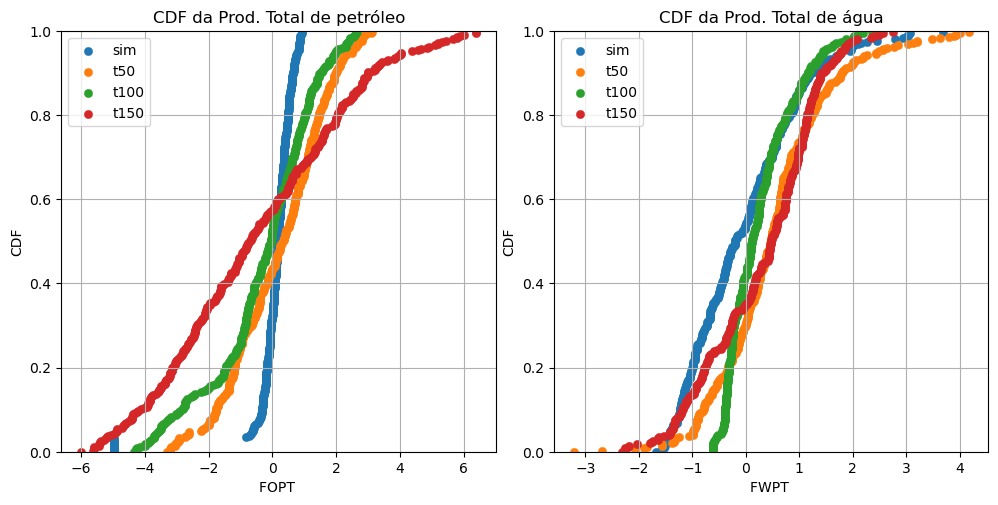

In [331]:

fig, axs = plt.subplots(1,2,figsize=(10,4.8))
print(np.shape(normalize(y_test_fopt))) 
fig.tight_layout()

# axs[0].ecdf(y_test_fopt, label='sim')
# axs[0].ecdf(ypred_50_fopt, label = 't50')
# axs[0].ecdf(ypred_100_fopt,label = 't100')
# axs[0].ecdf(ypred_150_fopt, label='t150')
# axs[0].legend()
# axs[0].grid()
# axs[0].set_xlabel("FOPT ")
# axs[0].set_ylabel("CDF")
# #axs[0].set_yticks([-0.2,1.1])
# axs[0].set_title("CDF da Prod. Total de petróleo")

axs[0].scatter(np.sort(y_test_fopt),np.arange(len(np.sort(y_test_fopt)))/float(len(np.sort(y_test_fopt))), label='sim',linewidths=0.3)
axs[0].scatter(np.sort(ypred_50_fopt),np.arange(len(np.sort(ypred_50_fopt)))/float(len(np.sort(ypred_50_fopt))), label='t50',linewidths=0.3)
axs[0].scatter(np.sort(ypred_100_fopt),np.arange(len(np.sort(ypred_100_fopt)))/float(len(np.sort(ypred_100_fopt))), label='t100',linewidths=0.3)
axs[0].scatter(np.sort(ypred_150_fopt),np.arange(len(np.sort(ypred_150_fopt)))/float(len(np.sort(ypred_150_fopt))), label='t150',linewidths=0.3)
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("FOPT ")
axs[0].set_ylabel("CDF")
axs[0].set_ylim([0,1])
axs[0].set_title("CDF da Prod. Total de petróleo")

axs[1].scatter(np.sort(y_test_fwpt),np.arange(len(np.sort(y_test_fwpt)))/float(len(np.sort(y_test_fwpt))), label='sim',linewidths=0.3)
axs[1].scatter(np.sort(ypred_50_fwpt),np.arange(len(np.sort(ypred_50_fwpt)))/float(len(np.sort(ypred_50_fwpt))), label='t50',linewidths=0.3)
axs[1].scatter(np.sort(ypred_100_fwpt),np.arange(len(np.sort(ypred_100_fwpt)))/float(len(np.sort(ypred_100_fwpt))), label='t100',linewidths=0.3)
axs[1].scatter(np.sort(ypred_150_fwpt),np.arange(len(np.sort(ypred_150_fwpt)))/float(len(np.sort(ypred_150_fwpt))), label='t150',linewidths=0.3)
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("FWPT ")
axs[1].set_ylabel("CDF")
axs[1].set_ylim([0,1])
axs[1].set_title("CDF da Prod. Total de água")

# axs[1].ecdf(y_test_fwpt,label = 'sim')
# axs[1].ecdf(ypred_50_fwpt,label = 't50')
# axs[1].ecdf(ypred_100_fwpt,label = 't100')
# axs[1].ecdf(ypred_150_fwpt,label = 't150')
# axs[1].set_xlabel("FWTP")
# axs[1].set_title("CDF da Prod. Total de água")
# axs[1].legend()
# axs[1].grid()

E o resultado do desvio que queremos é

In [340]:


RE_50_fopt =np.abs( np.abs(y_test_fopt - ypred_50_fopt) / y_test_fopt)
RE_100_fopt = np.abs(np.abs(y_test_fopt - ypred_100_fopt) / y_test_fopt)
RE_150_fopt =np.abs( np.abs(y_test_fopt - ypred_150_fopt) / y_test_fopt)

RE_50_fwpt =np.abs( np.abs(y_test_fwpt - ypred_50_fwpt) / y_test_fwpt)
RE_100_fwpt = np.abs(np.abs(y_test_fwpt - ypred_100_fwpt) / y_test_fwpt)
RE_150_fwpt =np.abs( np.abs(y_test_fwpt - ypred_150_fwpt) / y_test_fwpt)

#print(RE_50_fopt)

print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fopt)))
print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fwpt)))

print('O valor médio para o caso de 100 treinamentos é: {:.2f}%'.format(np.mean(RE_100_fopt)))
print('O valor médio para o caso de 100 treinamentos é: {:.2f}%'.format(np.mean(RE_100_fwpt)))

print('O valor médio para o caso de 150 treinamentos é: {:.2f}%'.format(np.mean(RE_150_fopt)))
print('O valor médio para o caso de 150 treinamentos é: {:.2f}%'.format(np.mean(RE_150_fwpt)))


O valor médio para o caso de 50 treinamentos é: 9.63%
O valor médio para o caso de 50 treinamentos é: 8.82%
O valor médio para o caso de 100 treinamentos é: 11.66%
O valor médio para o caso de 100 treinamentos é: 3.19%
O valor médio para o caso de 150 treinamentos é: 19.98%
O valor médio para o caso de 150 treinamentos é: 4.60%
